<a href="https://colab.research.google.com/github/Ahmed23Adel/Ahmed23Adel/blob/main/DL_JTA_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05
# Detecting Key points of Face Images

<img src="https://d3i71xaburhd42.cloudfront.net/8a1ed5e23231e86216c9bdd62419c3b05f1e0b4d/3-Figure2-1.png"
 width="400px" align="right">

# 0.0 Lecture review.

1. Inception module
2. Classification vs Localization vs Detection
3. Detection technique (Sliding window)
4. Replace 5x5 by 2 3x3 

### 0.1 Inception module.

<font color='orange'>What if I want to increase the neural network performance?</font> \\

1. Create deeper network(more length, and more units per  one layer); consequently it will be more capaple of extracting more features.
2. Or we may try learn from various scales.

<img src="https://images.squarespace-cdn.com/content/v1/5e48489da899cd09424943db/1610570570662-8BALYUJM7JQI4JV1X775/AustinKosier.54S.png"
 width="200px" align="right">
<font color='orange'>How can different scales be more powerful?</font> \\
The human **visual cortex** identifies patterns at <font color='yellow'>**different scales**</font>, which <font color='yellow'>**combine**</font> to form a complete <font color='yellow'>**picture**</font> of what is being seen.




<font color='orange'>Naive inception module</font> \\
We may then try using <font color='yellow'>**different kernel sizes**</font> for single input and <font color='yellow'>**concatenate**</font> them later.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*27SNg1gTB0HOVzTCAhp_Eg.png"
 width="500px" align="center">

 The biggest problem here is this single module it takes <font color='red'>120 M</font> mulplications

<font color='orange'>inception module</font> \\
They might be a different approach to limit that number of mulplications


<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*U04APgUo2xnLmyU2N_Bgig.png"
 width="700px" align="right">

The addition of 1x1 conv caused the number of multiplication to  <font color='red'>12 M</font> only
, meaning more effecient by approximatly <font color='green'>10</font> times

<br> <br> <br> <br> <br> <br> <br> 
<font color='orange'>How does 1x1 conv work?</font> \\
From Dr. slides. \\

It's capabale of compressing the channels of colored images at little cost, leaving a two-dimensional image to perform expensive 3x3 and 5x5 convolutions

<img src="https://drive.google.com/uc?export=view&id=1PGobM3e5r3-_n2EgG_AXahLmP8pOX9zk"
 width="500px" align="right">
 

<br> <br> <br> <br> <br> <br> <br> 
Reference: [Deep Learning: Understanding The Inception Module
](https://towardsdatascience.com/deep-learning-understand-the-inception-module-56146866e652)



### 0.2 Classification vs Localization vs Detection

<font color='orange'>Classification</font> \\
<img src="https://drive.google.com/uc?export=view&id=1gTCp1gnCsOIuC3SlmBvzzpwP-XZJaOT1"
 width="200px" align="right">
Simply <font color='yellow'>**single**</font> input(single object in the image) --> <font color='yellow'>**single**</font> output \\
It should be capable of saying that this image has a cat with probability of xx.yy%, but can't say where.




<br> <br> <br> <br> <br> <br> <br>

 <font color='orange'>Detection</font> \\
 <img src="https://drive.google.com/uc?export=view&id=1L1LYG0b9lni4Fb2KGuKveH2hRhtviwvv"
 width="200px" align="right">

 Single image(Containing <font color='yellow'>**multiple**</font> objects)--> outputs <font color='yellow'>**where**</font> are these objects and <font color='yellow'>**what they are**</font>.


 <font color='orange'>Localizatoin</font> \\
Byt Localization we mean how put rounding boxes around the object.

 


### 0.3 Detection technique (Sliding window)
Slide a window over the whole image.

Notice the <font color='yellow'>**scale**</font>  effect. It will not be able to detect face from small window. \\

 <img src="https://miro.medium.com/v2/resize:fit:500/1*xueLn_y8Owl31HoNVigVdQ.gif"
 width="500px" align="right">

 To make less computations you may use <font color='yellow'>**stride**</font>, You don't have go pixel by pixel.\\

 [Image sliding window using python](https://lengyi.medium.com/image-sliding-window-using-python-a0e97d2700b4)

In [ ]:
# @title init sliding window
!pip install ipywidgets
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import IFrame
import ipywidgets as widgets
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from IPython.display import clear_output
!wget -O slidingwindow.jpg "https://drive.google.com/uc?export=view&id=1EKwZkOQTzuAp7zJzNnx1-Sg8bn6GXJ65"
clear_output()

Button(description='left', style=ButtonStyle())

Button(description='right', style=ButtonStyle())

Button(description='top', style=ButtonStyle())

Button(description='bottom', style=ButtonStyle())

Button(description='Recompute', style=ButtonStyle())

img (1416, 1416, 3)
35363/35363 [==============================] - 0s 0us/step


'Predicted:'

[('n01739381', 'vine_snake', 0.038501617),
 ('n09229709', 'bubble', 0.021122681),
 ('n02281787', 'lycaenid', 0.021046164)]

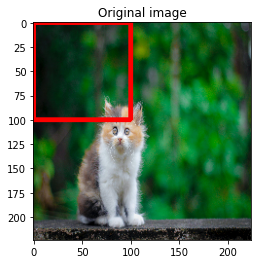

In [ ]:
# @title Sliding window example

box = [[0, 0], [50, 50] ] # top left, bottom right
_top_left_x = 0 #@param {type:'string'}
_top_left_y = "0" #@param {type:'string'}
_stride = "50" #@param {type:'string'}
_width = "100" #@param {type:'string'}
_height = "100" #@param {type:'string'}
width = int(_width)
height = int(_height)
stride = int(_stride)

img_orig = cv2.imread("/content/slidingwindow.jpg")
orig_height, orig_width,_ = img_orig.shape

def redraw_img():
  clear_output(wait=True)
  
  img_show = cv2.resize(img_orig, (224, 224))
  
  cv2.rectangle(img_show, (box[0][0], box[0][1]), (box[0][0] + width, box[0][1]+ height), (0, 0, 255), 3)
  plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)), plt.title("Original image")
  show_buttons()
  classify_img(img_orig[int(orig_width*box[0][0]/244):int(orig_height*(box[0][0] + width)/244), int(orig_width*box[0][1]/244):int(orig_height*(box[0][1] + width)/244) ])

widgets.Button(
    description='left',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check',
)


def left(b):
    box[0] = [max(0,int(box[0][0]-stride)), int(box[0][1])]
    box[1] = [max(0,int(box[1][0]-stride)), int(box[1][1])]
    redraw_img()

def right(b):
    box[0] = [max(0,int(box[0][0]+stride)), int(box[0][1])]
    box[1] = [max(0,int(box[1][0]+stride)), int(box[1][1])]
    redraw_img()

def top(b):
    box[0] = [max(0,int(box[0][0])), int(box[0][1] - stride)]
    box[1] = [max(0,int(box[1][0])), int(box[1][1] - stride)]
    redraw_img()

def bottom(b):
    box[0] = [max(0,int(box[0][0])), int(box[0][1] + stride)]
    box[1] = [max(0,int(box[1][0])), int(box[1][1] + stride)]
    print(box)
    redraw_img()

def recomb(b):
  redraw_img()
def show_buttons():
  left_button = widgets.Button(description="left")
  left_button.on_click(left)
  display(left_button)

  right_button = widgets.Button(description="right")
  right_button.on_click(right)
  display(right_button)

  top_button = widgets.Button(description="top")
  top_button.on_click(top)
  display(top_button)

  bottom_button = widgets.Button(description="bottom")
  bottom_button.on_click(bottom)
  display(bottom_button)

  comp_button = widgets.Button(description="Recompute")
  comp_button.on_click(recomb)
  display(comp_button)

def classify_img(img):
  print("img", img.shape)
  model = ResNet50(weights='imagenet')
  img = cv2.resize(img, (224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  display('Predicted:', decode_predictions(preds, top=3)[0])
redraw_img()
# # Classify the entire image
# model = ResNet50(weights='imagenet')
# img_path = '/content/slidingwindow.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# preds = model.predict(x)
# display('Predicted:', decode_predictions(preds, top=3)[0])


# 2 Detection of facial keypoints 

Our goal in this lab is to predict keypoints in the face

 <img src="https://drive.google.com/uc?export=view&id=1g1VKlYaGo3-RR5Kag5AMjHfJbTyf7kG7"
 width="700px" align="right">
</br> </br> </br> </br>
Don't fill your head of questions like "is it regression problem or classficatoin problem?" Neural network is a universal approximator for any funtion, according to <font color='yellow'> Universal approximation theorm </font>. It can approximate any imaginable function (function that take an image and return facial key points in it for example.) \\

But we actually model it as <font color='yellow'> **regression** </font> problem

<font color='orange'>Regression approach</font> \\

 <img src="https://drive.google.com/uc?export=view&id=1czcSLelvlFfDpwLkCzFjUfoqb8rc9sw5"
 width="200px" align="right" style="margin-right = 100px">

  <img src="https://drive.google.com/uc?export=view&id=1ktvROQRlU6o8YY1jo3rdp-FZx9BvGS56"
 width="200px" align="right" style="margin-right = 100px">
  <img src="https://drive.google.com/uc?export=view&id=1BxMQflDklpUFy34dt_p7w9I49qR9x_J-"
 width="230px" align="right" style="margin-right = 150px">
</br> </br> </br> </br> </br> </br> </br> </br>


 <font color='orange'>Loss function</font> \\
Consider true label and predicted one: \\
  <img src="https://drive.google.com/uc?export=view&id=1S13zBFyTooessAFRqCLRHot2Ir2D0Hje"
 width="400px" align="right" style="margin-right = 150px">

 please note the following:
1. Pc: probability of the image contains a face or not
2. L1x, L1Y: is the cartesian cordinates for landmark number 1.\\
We may use the following for the loss function: \\
</br> </br>
$
\begin{equation}
 Loss = \begin{cases}
       \sum_{i=0}^{N}(y_i - \hat{y_i})^2 & \text{if pc >=0.5; meaning ther is a face in the image }  \\
       (y_0 - \hat{y_0})^2 & \text{if pc < 0.5; meaning ther is an no face, all others are don't care} \\
     \end{cases}
\end{equation}
$


 <font color='orange'>Applications</font> \\
 1. Face recognition
 2. face analysis (You can predict is the person happy or not from facial landmarks)


<font color='orange'>Challenges</font> \\
 1. Illumination
 2. Face orientation
 3. You will probably deploy it in runtime software so it needs light model and can at least detect  one image per one second
 4. please note that at runtime data wil have more noise in the background in clear face, so your model must as generalizable as possible, and different scenaries must be included in your dataset.

 Note that Facial feature points are different from keypoints for image registration, while keypoint detection is usually an unsupervised procedure.

# 3.0 Literature review


### 3.1 Deep Convolutional Network Cascade for Facial Point Detection


It aims to detect ﬁve facial points to be detected: left eye center (LE), right eye center (RE), nose tip (N), left mouth corner (LM), and right mouth corner (R- M).


  <img src="https://drive.google.com/uc?export=view&id=1EbNdvBaC2RdGnLE2gH9BrbG_V2Gs6gNq"
 width="800px" align="right" style="margin-right = 150px">

</br> </br> </br> </br> </br> </br> </br> </br> </br> </br>




1.   It splitted the network into three seperate stages
2.    At the ﬁrst level, they employed three deep convolutional networks, each predicting multiple facial points
3. For each facial point, the predictions of multiple networks are averaged to reduce the variance
4. Networks at the second and third levels take local patches centered at the predicted positions of facial points from previous levels as input and are only allowed to make small changes to previous predictions
5. The predicted position of each point at the last two levels is given by the average of the two networks with different patch sizes
6. While networks at the ﬁrst level aim to estimate keypoint positions robustly with few large errors, networks at the last two levels are designed to achieve high accuracy by fine tuning the landmark position
7. So the input regions of networks at the ﬁrst level should be large in order to cover many possible predictions. But large input region is the major cause of inaccuracy because irrelevant areas in- cluded may degrade the ﬁnal output of the network
8. The outputs of networks at the ﬁrst level provide a strong prior for the following detections, i.e., the true position of a facial point should lie within a small region around the prediction at the ﬁrst level




 <img src="https://drive.google.com/uc?export=view&id=1AO2Mhgg9CH7_zqs3HGEiCw6E-B1D5rSg"
 width="200px" align="right" >

  <img src="https://drive.google.com/uc?export=view&id=1LKMzmquXizyIdHOA8C4P2pHEtPMBuu-m"
 width="200px" align="right" >
  <img src="https://drive.google.com/uc?export=view&id=1bB1yvWCaqcq_GL-tb5hNi54hH8CJORFQ"
 width="230px" align="right" >

</br> </br> </br> </br> </br> </br> </br> </br> </br> </br>

   <img src="https://drive.google.com/uc?export=view&id=1H4iZW-IufdYpXosf9G76VjPjGUxnzzQI"
 width="400px" align="right" >


### 3.2 Extensive Facial Landmark Localization with Coarse-to-ﬁne Convolutional Network Cascade

Like the previous one but predict 51 landmarks

   <img src="https://drive.google.com/uc?export=view&id=1EMP7TFOwCG-L2prWOiGGwk3rAAGxEGJd"
 width="800px" align="right" >

</br> </br> </br> </br> </br> </br> </br> </br> </br> </br> </br> </br> </br> </br>

1.   In the ﬁrst level, two neural networks are trained to estimate the bounding boxes

2.   Af- ter obtaining the bounding box of inner points, the 51 inner landmarks are initially estimated by the second level
3. the third level is trained to reﬁne the landmarks of each facial component independently.

Particularly, the contour is signiﬁcantly more difﬁcult than inner points for two reasons.


1.   First, the facial image provides less local texture information for contour points compared to the inner landmarks
2.   Additionally, the ground truth for these points is by nature more noisy


Loss function:


   <img src="https://drive.google.com/uc?export=view&id=1OxWhP0BqXMlIC9Txv5WyxHPxJgePRKaH"
 width="400px" align="right" >

### 3.3 A Deep Residual convolutional neural network for facial keypoint detection with missing labels


   <img src="https://drive.google.com/uc?export=view&id=15VgJwgu54opAbHrv9UB6yBwMMTWXFSDA"
 width="200px" align="right" >


1.   They used 32 kernels with a large kernel size of 11 × 11 on the ﬁrst convolu- tional layer and followed by a max pooling layer to both reduce the dimentionality and ﬁnd out the most discriminative features
2.   The following four convolutional layers are in two ResNet blocks. They used the kernal size of 3 × 3 in order to achieve predicting lo- cal small regions
3. Instead of using pooling layer between residual blocks, they used a strided convolu- tion at the last convolutional layer of each residual block to allow the network to learn its own spatial downsampling

They stated the data augmentation is crucial for this problem.\\
Error function is <font color="yellow"> RMSE</font>




### 3.4 Faster R-CNN and YOLO based Vehicle detection: A Survey

It covers two famous architectures

<font color='orange'> Region-based Convolutional Network (R-CNN) </font>
   <img src="https://drive.google.com/uc?export=view&id=1Rn0fq-xQqa0WH3Q25N7wOitK5taLpgbp"
 width="500px" align="right" >


1.   R-CNN is one of the primary deep neural network which is designed to perform object detection
2.   R-CNN uses object proposals generated by selective search to train CNN for performing object detection and generating 2000 candidate boxes
3. Each candidate box is then warped into fixed size and given as input to the CNN which in turn acts as a feature extractor and produces 4096 dimensional feature as a output
4. This set of features is fed to the SVM classifier to perform classification

But:


1.   Huge time complexity, which makes R-CNN not suitable for real life applications.

2.   It caches the extracted features from the pre-trained CNN on the disk to later train the SVMs. This requires hundreds of gigabytes of storage.




You may want to search for <font color="yellow"> Fast R-CNN</font>



### 3.5 Facial Key Points Detection using Deep Convolutional Neural Network - NaimishNet – reread please

  <img src="https://drive.google.com/uc?export=view&id=1iIYQ23fi2jYW6Z5rjwV4Z7h--pjouHTG"
 width="200px" align="right" >

 

1.   They used Exponential Linear Unit (ELU) is very similar to Rectified Linear Unit (ReLU) except for negative inputs
2.   Dropout probability is increased from 0.1 to 0.6 from Dropout1 to Dropout6, with a step size of 0.1
3. Used Adam optimizer
4. Data Pre-processing: The image pixels are normalized to the range [0, 1] by dividing by 255.0, and the train targets are zero-centered to the range [−1, 1] by ﬁrst dividing by 48.0, since the images are 96 × 96, and then subtracting 48.0. 






### 3.6 A Supervised Learning Methodology for Real-Time Disguised Face Recognition in the Wild

  <img src="https://drive.google.com/uc?export=view&id=1TXCVzecm6t5MG6zTbPayScyEtk2RsIc8"
 width="400px" align="right" >



1.   They used SVM as classifier after feature extractor
2.   It is a common understanding that SVMs are meant for real-time applications, SVM can be more robust and accurate than MLP, SVM can reduce overfitting and improve generalization by using regularization and margin optimization





# Imports


In [ ]:
import json
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import json
from keras.utils import Sequence
import os
import pandas as pd
import cv2
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D,MaxPooling2D,AveragePooling2D, Dense, GlobalAveragePooling2D
from keras import optimizers, callbacks
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Flatten, Concatenate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import MeanSquaredError, AUC
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CallbackList
from tensorflow.keras.utils import Progbar
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics 
from IPython.display import clear_output
from keras.models import load_model 
import shutil
from tensorflow.keras.utils import img_to_array
clear_output()

#4.0 Explore kaggle dataset

In [ ]:
# @title Download dataset from kaggle
! pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d prashantarorat/facial-key-point-data
! mkdir comp_data
! unzip /content/facial-key-point-data.zip -d comp_data
clear_output()

### 4.0 Explore

In [ ]:
key_points_file = open ('/content/comp_data/all_data.json', "r")
key_points = json.loads(key_points_file.read())
key_points_file.close()

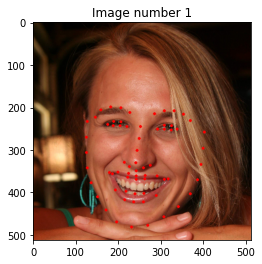

In [ ]:
def show_face_lands(img_number: str):
  img = cv2.imread(f"/content/comp_data/images/{str(img_number).zfill(5)}.png") ## Reading the image, Note that zfill fills zeros at left to match their image naems
  facial_keypoints = key_points[str(img_number)]['face_landmarks'] # Find key points from json file
  for key_point in facial_keypoints:
    land = (int(key_point[0]), int(key_point[1])) # Converting the point to interger
    cv2.circle(img, land , 2, (0, 0, 255), 2) # Draw each point
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title(f"Image number {img_number}") # Plotting the image using matplot
show_face_lands(1)


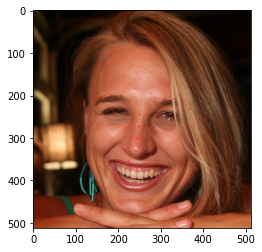

In [ ]:
def show_face_lands_normalized(img, y_norm, img_width = 512, img_height = 512, save = False, filename = "tst.png",  show_img = True):
  for idx in range(0,len(y_norm), 2): # For every two consecutive elements they are elementx, and element y
    yx, yy = int(y_norm[idx] * img_width), int(y_norm[idx+1] * img_height)
    cv2.circle(img, (yx, yy) , 2, (0, 0, 255), 1) # Draw each point
  if save: 
    cv2.imwrite(filename, img)
  if show_img:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# Plotting the image using matplot

def get_landmarks_for_img_norm(img_name):
    list_of_lands= key_points[str(img_name)]['face_landmarks']
    comp_lands = [item for sublist in list_of_lands for item in sublist]
    return [x / 512 for x in comp_lands]

tst_img = cv2.imread("/content/comp_data/images/00001.png")
lands_norm = get_landmarks_for_img_norm(1)
show_face_lands_normalized(tst_img, lands_norm, show_img = True)

# 5.0 init data for all models

In [ ]:
class FacialLandmarkGenerator (Sequence):
  def __init__ (self, image_dir, data_type="train", batch_size=32, shuffle=True, image_list=None, img_width = 256, img_height = 256):
    self.data_type = data_type
    assert self.data_type == "train" or self.data_type == "val" or self.data_type == "test" 
    self.image_dir = image_dir # directory where images are stored
    self.batch_size = batch_size # batch size
    self.shuffle = shuffle # whether to shuffle data or not
    self.image_list = None # list of image names or None
    self.on_epoch_end () # load data samples
    self.img_width, self.img_height = img_width, img_height
    self.image_augmenter = ImageDataGenerator (
                                        rotation_range=45,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='constant',
                                        cval=125
                                    )

  def get_landmarks_for_img_norm(self, img_name):
    list_of_lands= key_points[str(img_name)]['face_landmarks']
    comp_lands = [item for sublist in list_of_lands for item in sublist]
    return [x / 512 for x in comp_lands]

  def __len__ (self):
    return int (np.ceil (len (self.image_list) / float (self.batch_size))) # number of batches per epoch

  def __getitem__ (self, index):
    batch_data = self.image_list [index * self.batch_size: (index + 1) * self.batch_size] # get one batch of data
    X = [] # list to store images
    y = [] # list to store landmarks
    for sample_name in batch_data:
      file_name = f"/content/comp_data/images/{sample_name}" # get file name from sample
      # landmarks = get_landmarks_for_img(int(sample_name.split(".")[0]))
      # landmarks = [x / 512 for x in landmarks]
      landmarks = self.get_landmarks_for_img_norm(int(sample_name.split(".")[0]))
      image = cv2.imread (file_name) / 255.0 # read image from file and normalize it by pixel range
      image = cv2.resize(image, (self.img_width, self.img_height))
      X.append (image) # append image to X list
      y.append (landmarks) # append landmarks to y list
    
    X = np.array (X) # convert list to array
    y = np.array (y) # convert list to array
    augmented_generator = self.image_augmenter.flow(X, y)
    return next(augmented_generator)

  def on_epoch_end (self):  
    
    if self.image_list is None:
      self.image_list = sorted(os.listdir(self.image_dir))
      if self.data_type == "train":
        self.image_list = self.image_list[:int(len(self.image_list) * 0.6)] # get all image names from directory
      elif self.data_type == "val":
        self.image_list = self.image_list[int(len(self.image_list) * 0.6):int(len(self.image_list) * 0.8)] # get all image names from directory
      elif self.data_type == "test": 
        self.image_list = self.image_list[int(len(self.image_list) * 0.8):] # get all image names from directory
    print(len(self.image_list))

In [ ]:
t = FacialLandmarkGenerator("/content/comp_data/images", "val")

1000


In [ ]:
x, y = next(iter(t))

In [ ]:
x1, y1 = np.array(x), np.array(y)
x1.shape, y1.shape

((32, 256, 256, 3), (32, 136))

# 7.0 Model 1

### 7.0 Model builder

In [ ]:
section_number = 1

In [ ]:
HEIGHT = 256
WIDTH = 256
def model_builder():
  # Specify model architecture
  model = Sequential()
  # Block 1
  model.add(Conv2D(128, (3, 3),
                  activation='relu',
                  kernel_initializer='he_uniform',
                  padding='same',
                  input_shape=(HEIGHT, WIDTH, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.1))
  # Block 2
  model.add(Conv2D(256,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # Block 3
  model.add(Conv2D(512,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  # Block 4
  model.add(Conv2D(256,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  # Block 5
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  # Block 6
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  # FC part
  model.add(Flatten())
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(136, activation='relu', kernel_initializer='he_uniform'))
  # Print summary
  model.summary()
  return model
 
model = model_builder()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 128, 128, 128)    0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 128, 128, 128)     0         
                                                                 
 conv2d_37 (Conv2D)          (None, 126, 126, 256)     295168    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 63, 63, 256)      0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 63, 63, 256)      

### 7.1 Get model from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

def get_model(model_numer = None, last_avilable_model = True):
  all_models = os.listdir("/content/drive/MyDrive/DL_JTA/Lab05/training_models")
  all_models = sorted(all_models)
  if len(all_models) == 0:
    print("Found no models on drive, i will get you a new one to train")
    return model_builder()
  if model_numer is None:
      print("returning latest model on google drive")
      model = load_model (f'/content/drive/MyDrive/DL_JTA/Lab05/training_models/{all_models[-1]}')
      return model
  else:
    assert f"model1_epoch{model_numer}.h5" in all_models
    model = load_model (f'/content/drive/MyDrive/DL_JTA/Lab05/training_models/{model_numer}')
    return model
      
get_model()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
returning latest model on google drive


### 7.2 save model on google drive

In [ ]:
def save_img(epoch):
  for img_num in range(1, 3):
    img_name = f"tst_imgs/tst{img_num}_{epoch}.png"
    shutil.copy(img_name ,f'/content/drive/MyDrive/DL_JTA/Lab05/training_imgs/') # The colored-first


In [ ]:
def number_counter():
  num = 0
  while True:
    yield num
    num +=1
num_counter = number_counter()
def save_mode(model, offset = 0):
  cur_num = next(num_counter)
  model.save(f"model{section_number}_epoch{cur_num + offset}.h5")
  shutil.copy(f"model{section_number}_epoch{cur_num + offset}.h5" ,f'/content/drive/MyDrive/DL_JTA/Lab05/training_models/') # The colored-first


In [ ]:
save_mode(model)

### 7.4 optimizer

In [ ]:
lr = 0.001 # You can change this value 
beta_1 = 0.9 # Default value 
beta_2 = 0.999 # Default value 
epsilon = 1e-07 # Default value 
# Create an instance of Adam optimizer
optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)

### 7.5 For testing the model

In [ ]:
!mkdir tst_imgs
model = get_model()
def _test_model(filename = None, img_num = '03000', img = None, show_img = False, save = True, save_name = None):
  if img is None:
    img =cv2.imread(filename)
  img = cv2.resize(img, (256, 256))
  # Convert it to a numpy array
  img_array = img_to_array(img)

  # Add a batch dimension
  img_batch = np.expand_dims(img_array, axis=0)

  # Pass it to the model
  print(img_batch.shape)
  lands_norm = model.predict(img_batch)

  show_face_lands_normalized(img, lands_norm[0], show_img = show_img, save = save, filename = save_name, img_width = 256, img_height = 256)

def test_model(epoch):
  _test_model(img = cv2.imread("/content/comp_data/images/03000.png"), show_img  = False, save_name = f"tst_imgs/tst1_{epoch}.png")
  _test_model(img = cv2.imread("/content/comp_data/images/03001.png"), show_img  = False, save_name = f"tst_imgs/tst2_{epoch}.png")
test_model(0)

mkdir: cannot create directory ‘tst_imgs’: File exists
returning latest model on google drive


(1, 256, 256, 3)
1/1 [==============================] - 0s 128ms/step
(1, 256, 256, 3)
1/1 [==============================] - 0s 22ms/step


### 7.6 Training


The loss function is a function that measures how well the model predicts the true values. It takes the true values and the predicted values as inputs and returns a scalar value that represents the discrepancy between them. The loss function is used to compute the gradients of the model’s weights and update them using the optimizer. The loss function can also be used as a metric to evaluate the model’s performance, but it is not necessarily the same as the metric.

The tracker is an instance of a Keras metric class that tracks the state of a metric over time. It has methods to update its state with new values, reset its state, and retrieve its current result. The tracker can be used to monitor any metric that you are interested in, such as accuracy, precision, recall, etc. The tracker is not used to update the model’s weights or affect its training process.

The metric is a value that reflects how well the model performs on a certain task or aspect. It can be calculated using a function or a class that takes the true values and the predicted values as inputs and returns a scalar value or a tensor of values. The metric can be used to evaluate the model’s performance on training data or validation data, and compare it with other models or baselines. The metric can also be used as a loss function if it is differentiable and suitable for optimization.

In [ ]:
model = get_model()

returning latest model on google drive


In [ ]:
# mse_metric = MeanSquaredError(name="mse") # You can change the name if you want 
# auc_metric = AUC(name="auc") # You can change the name and other parameters if you want 
loss_fn = mean_squared_error # Your loss function
train_loss_tracker = tf.keras.metrics.Mean() # To track training loss
val_loss_tracker = tf.keras.metrics.Mean() # To track validation loss
train_acc_metric = MeanSquaredError(name="mse") # Your metric for training accuracy
val_acc_metric = MeanSquaredError(name="mse") # Your metric for validation accuracy

In [ ]:
# Define your train_step and val_step functions
@tf.function(experimental_relax_shapes=True)
def train_step(x, y):
  with tf.GradientTape() as tape:
    logits = model(x, training=True) # Forward pass
    loss_value = loss_fn(y, logits) # Compute loss
  grads = tape.gradient(loss_value, model.trainable_weights) # Compute gradients
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # Update weights
  train_loss_tracker.update_state(loss_value) # Update training loss tracker
  train_acc_metric.update_state(y, logits) # Update training accuracy metric
  return {"train_loss": train_loss_tracker.result(), "train_accuracy": train_acc_metric.result()} # Return a dict of metrics

@tf.function(experimental_relax_shapes=True)
def val_step(x, y):
  val_logits = model(x, training=False) # Forward pass without updating weights
  val_loss = loss_fn(y, val_logits) # Compute validation loss
  val_loss_tracker.update_state(val_loss) # Update validation loss tracker
  val_acc_metric.update_state(y, val_logits) # Update validation accuracy metric 
  return {"val_loss": val_loss_tracker.result(), "val_accuracy": val_acc_metric.result()} # Return a dict of metrics


In [ ]:
# Initialize some variables for logging 
logs = {} 
epochs = 50 # Number of epochs you want to train for 
batch_size = 32 # Batch size for your data 
verbose = 1 # Display frequency (0: silent, 1: update after each batch, 2: update after each epoch)
# Start the custom loop 
# callbacks.on_train_begin(logs=logs) # Call this at the beginning of training 
progbar = Progbar(target=int(int(len(os.listdir("/content/comp_data/images")) * 0.6) / batch_size), verbose=verbose)
early_stopping = EarlyStopping(monitor="val_loss", patience=3)
valid_dict = {}
# Start the custom loop 
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))
  

  for step, (x_batch_train,y_batch_train) in enumerate(FacialLandmarkGenerator("/content/comp_data/images", "train")): 
    
    # Perform one step of gradient descent on a batch of training data 
    train_dict = train_step(x_batch_train,y_batch_train)	
    
    # Update the progbar with the current step and metrics 
    progbar.update(step + 1, values=[("train_loss", train_dict["train_loss"])])
    
    # if step % 30 == 0:	# Print some information every 100 steps 
    #   print("Training loss (for one batch) at step %d: %.4f" % (step,float(train_dict["train_loss"])))
    #   print("Training MSE (for one batch) at step %d: %.4f" % (step,float(train_dict["train_loss"])))
  test_model(epoch)

  if epoch %5 ==0:
    save_mode(model, offset = 71)
    save_img(epoch)


  valid_dict["val_loss"] = 0
  for x_batch_val,y_batch_val in FacialLandmarkGenerator("/content/comp_data/images", "val"):
    valid_dict["val_loss"] += val_step(x_batch_val,y_batch_val)["val_loss"]
    
  print("Validation loss: %.4f" % float(valid_dict["val_loss"]))
    
    # Pass the validation metric to the early stopping callback
  # early_stopping.on_epoch_end(epoch, {'val_loss': valid_dict["val_loss"], 'best': valid_dict["val_loss"]})
    
  # if early_stopping.stop_training:	# Check if we should stop training 
  #   break	# Break out of the epoch loop 

  train_loss_tracker.reset_states()	# Reset the state of the tracker after each epoch 
  val_loss_tracker.reset_states()	# Reset the state of the tracker after each epoch 




Start of epoch 0
3000
94/93 [==============================] - 119s 1s/step - train_loss: 0.0826
(1, 256, 256, 3)
1/1 [==============================] - 0s 113ms/step
(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step


1000
Validation loss: 2.6419

Start of epoch 1
3000
94/93 [==============================] - 258s 1s/step - train_loss: 0.0826
(1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step
(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step
1000
Validation loss: 2.6418

Start of epoch 2
3000
94/93 [==============================] - 394s 1s/step - train_loss: 0.0826
(1, 256, 256, 3)
1/1 [==============================] - 0s 24ms/step
(1, 256, 256, 3)
1/1 [==============================] - 0s 23ms/step
1000
Validation loss: 2.6418

Start of epoch 3
3000
94/93 [==============================] - 534s 1s/step - train_loss: 0.0826
(1, 256, 256, 3)
1/1 [==============================] - 0s 27ms/step
(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step
1000
Validation loss: 2.6418

Start of epoch 4
3000
22/93 [======>.......................] - ETA: 1:24 - train_loss: 0.0826

# 8.0 Model 2

Try transfer learning

In [ ]:
section_number = 2
HEIGHT = 224
WIDTH = 224

In [ ]:
from keras.applications import ResNet50
from keras.models import Model

def model_builder():
  
  base_model =  ResNet50(weights='imagenet', 
                         input_shape = (HEIGHT, WIDTH, 3))
  # Add new classifier layers
  x = Flatten()(base_model.layers[-1].output)
  x = Dropout(0.5)(x)

  x = Dense(512, activation='relu')(x)
  x = Dropout(0.4)(x)

  x = Dense(256, activation='relu')(x)
  x = Dropout(0.3)(x)

  x = Dense(136, activation='sigmoid')(x)
  x = Dense(136, activation='sigmoid')(x)
  output = Dense(136, activation='sigmoid')(x)

  # Print base model summary
  
  model = Model(inputs = base_model.inputs, outputs = output)
  model.summary()

  return model
 
model = model_builder()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

### 8.1 Get model from googld drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

def get_model(model_numer = None, last_avilable_model = True):
  all_models = os.listdir("/content/drive/MyDrive/DL_JTA/Lab05/training_models")
  all_models = sorted(all_models)
  all_models = [x for x in all_models if f"model{section_number}" in x]
  if len(all_models) == 0:
    print("Found no models on drive, i will get you a new one to train")
    return model_builder()
  if model_numer is None:
      print(f"returning latest model on google drive of section number = {section_number}")
      model = load_model (f'/content/drive/MyDrive/DL_JTA/Lab05/training_models/{all_models[-1]}')
      return model
  else:
    assert f"model{section_number}_epoch{model_numer}.h5" in all_models
    model = load_model (f'/content/drive/MyDrive/DL_JTA/Lab05/training_models/{model_numer}')
    return model
      
get_model()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
returning latest model on google drive of section number = 2


### 8.2 Save model on google drive

In [ ]:
def save_img(epoch):
  for img_num in range(1, 3):
    img_name = f"/content/tst_imgs/section{section_number}_tst{epoch}_{img_num}.png"
    shutil.copy(img_name ,f'/content/drive/MyDrive/DL_JTA/Lab05/training_imgs/') # The colored-first


In [ ]:
def number_counter():
  num = 0
  while True:
    yield num
    num +=1
num_counter = number_counter()
def save_mode(model, offset = 0):
  cur_num = next(num_counter)
  model.save(f"model{section_number}_epoch{cur_num + offset}.h5")
  shutil.copy(f"model{section_number}_epoch{cur_num + offset}.h5" ,f'/content/drive/MyDrive/DL_JTA/Lab05/training_models/') # The colored-first


### 8.3 Optimizer

In [ ]:
lr = 0.001 # You can change this value 
beta_1 = 0.9 # Default value 
beta_2 = 0.999 # Default value 
epsilon = 1e-07 # Default value 
# Create an instance of Adam optimizer
optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)

### 8.4 For testing the model

In [ ]:
!mkdir tst_imgs
model = get_model()
def _test_model(filename = None, img_num = '03000', img = None, show_img = False, save = True, save_name = None):
  if img is None:
    img =cv2.imread(filename)
  img = cv2.resize(img, (WIDTH, HEIGHT))
  # Convert it to a numpy array
  img_array = img_to_array(img)

  # Add a batch dimension
  img_batch = np.expand_dims(img_array, axis=0)

  # Pass it to the model
  print(img_batch.shape)
  lands_norm = model.predict(img_batch)

  show_face_lands_normalized(img, lands_norm[0], show_img = show_img, save = save, filename = save_name, img_width = WIDTH, img_height = HEIGHT)

def test_model(epoch):
  _test_model(img = cv2.imread("/content/comp_data/images/03000.png"), show_img  = False, save_name = f"tst_imgs/section{section_number}_tst{epoch}_{1}.png")
  _test_model(img = cv2.imread("/content/comp_data/images/03001.png"), show_img  = False, save_name = f"tst_imgs/section{section_number}_tst{epoch}_{2}.png")
test_model(0)

mkdir: cannot create directory ‘tst_imgs’: File exists
returning latest model on google drive of section number = 2


(1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step


### 8.5 Training

In [ ]:
model = get_model()

returning latest model on google drive of section number = 2


In [ ]:
loss_fn = mean_squared_error # Your loss function
train_loss_tracker = tf.keras.metrics.Mean() # To track training loss
val_loss_tracker = tf.keras.metrics.Mean() # To track validation loss
train_acc_metric = MeanSquaredError(name="mse") # Your metric for training accuracy
val_acc_metric = MeanSquaredError(name="mse") # Your metric for validation accuracy

In [ ]:
# Define your train_step and val_step functions
@tf.function(experimental_relax_shapes=True)
def train_step(x, y):
  with tf.GradientTape() as tape:
    logits = model(x, training=True) # Forward pass
    loss_value = loss_fn(y, logits) # Compute loss
  grads = tape.gradient(loss_value, model.trainable_weights) # Compute gradients
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # Update weights
  train_loss_tracker.update_state(loss_value) # Update training loss tracker
  train_acc_metric.update_state(y, logits) # Update training accuracy metric
  return {"train_loss": train_loss_tracker.result(), "train_accuracy": train_acc_metric.result()} # Return a dict of metrics

@tf.function(experimental_relax_shapes=True)
def val_step(x, y):
  val_logits = model(x, training=False) # Forward pass without updating weights
  val_loss = loss_fn(y, val_logits) # Compute validation loss
  val_loss_tracker.update_state(val_loss) # Update validation loss tracker
  val_acc_metric.update_state(y, val_logits) # Update validation accuracy metric 
  return {"val_loss": val_loss_tracker.result(), "val_accuracy": val_acc_metric.result()} # Return a dict of metrics


In [ ]:
# Initialize some variables for logging 
logs = {} 
epochs = 50 # Number of epochs you want to train for 
batch_size = 32 # Batch size for your data 
verbose = 1 # Display frequency (0: silent, 1: update after each batch, 2: update after each epoch)
# Start the custom loop 
# callbacks.on_train_begin(logs=logs) # Call this at the beginning of training 
progbar = Progbar(target=int(int(len(os.listdir("/content/comp_data/images")) * 0.6) / batch_size), verbose=verbose)
early_stopping = EarlyStopping(monitor="val_loss", patience=3)
valid_dict = {}
# Start the custom loop 
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))
  

  for step, (x_batch_train,y_batch_train) in enumerate(FacialLandmarkGenerator("/content/comp_data/images", "train", img_width = WIDTH, img_height = HEIGHT)): 
    
    # Perform one step of gradient descent on a batch of training data 
    train_dict = train_step(x_batch_train,y_batch_train)	
    
    # Update the progbar with the current step and metrics 
    progbar.update(step + 1, values=[("train_loss", train_dict["train_loss"])])
    
    # if step % 30 == 0:	# Print some information every 100 steps 
    #   print("Training loss (for one batch) at step %d: %.4f" % (step,float(train_dict["train_loss"])))
    #   print("Training MSE (for one batch) at step %d: %.4f" % (step,float(train_dict["train_loss"])))
  test_model(epoch)

  if epoch %5 ==0:
    save_mode(model, offset = 0)
    save_img(epoch)


  valid_dict["val_loss"] = 0
  for x_batch_val,y_batch_val in FacialLandmarkGenerator("/content/comp_data/images", "val", img_width = WIDTH, img_height = HEIGHT):
    valid_dict["val_loss"] += val_step(x_batch_val,y_batch_val)["val_loss"]
    
  print("Validation loss: %.4f" % float(valid_dict["val_loss"]))
    
    # Pass the validation metric to the early stopping callback
  # early_stopping.on_epoch_end(epoch, {'val_loss': valid_dict["val_loss"], 'best': valid_dict["val_loss"]})
    
  # if early_stopping.stop_training:	# Check if we should stop training 
  #   break	# Break out of the epoch loop 

  train_loss_tracker.reset_states()	# Reset the state of the tracker after each epoch 
  val_loss_tracker.reset_states()	# Reset the state of the tracker after each epoch 




Start of epoch 0
3000
94/93 [==============================] - 122s 928ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 1s 904ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step


1000
Validation loss: 0.0369

Start of epoch 1
3000
94/93 [==============================] - 228s 870ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
1000
Validation loss: 0.0368

Start of epoch 2
3000
94/93 [==============================] - 328s 875ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 47ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 40ms/step
1000
Validation loss: 0.0368

Start of epoch 3
3000
94/93 [==============================] - 427s 867ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
1000
Validation loss: 0.0368

Start of epoch 4
3000
94/93 [==============================] - 526s 867ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/st

1000
Validation loss: 0.0368

Start of epoch 6
3000
94/93 [==============================] - 728s 874ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
1000
Validation loss: 0.0368

Start of epoch 7
3000
94/93 [==============================] - 829s 870ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
1000
Validation loss: 0.0368

Start of epoch 8
3000
94/93 [==============================] - 928s 868ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
1000
Validation loss: 0.0368

Start of epoch 9
3000
94/93 [==============================] - 1028s 864ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 43ms/s

1000
Validation loss: 0.0367

Start of epoch 11
3000
94/93 [==============================] - 1230s 873ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 32ms/step
1000
Validation loss: 0.0367

Start of epoch 12
3000
94/93 [==============================] - 1331s 872ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
1000
Validation loss: 0.0367

Start of epoch 13
3000
94/93 [==============================] - 1430s 867ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step
1000
Validation loss: 0.0367

Start of epoch 14
3000
94/93 [==============================] - 1531s 870ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s

1000
Validation loss: 0.0367

Start of epoch 16
3000
94/93 [==============================] - 1731s 867ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 45ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 45ms/step
1000
Validation loss: 0.0367

Start of epoch 17
3000
94/93 [==============================] - 1831s 873ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 24ms/step
1000
Validation loss: 0.0367

Start of epoch 18
3000
94/93 [==============================] - 1931s 868ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
1000
Validation loss: 0.0367

Start of epoch 19
3000
94/93 [==============================] - 2032s 869ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s

1000
Validation loss: 0.0367

Start of epoch 21
3000
94/93 [==============================] - 2231s 858ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 43ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 46ms/step
1000
Validation loss: 0.0367

Start of epoch 22
3000
94/93 [==============================] - 2330s 865ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
1000
Validation loss: 0.0367

Start of epoch 23
3000
94/93 [==============================] - 2429s 864ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
1000
Validation loss: 0.0367

Start of epoch 24
3000
94/93 [==============================] - 2529s 870ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s

1000
Validation loss: 0.0367

Start of epoch 26
3000
94/93 [==============================] - 2729s 870ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
1000
Validation loss: 0.0367

Start of epoch 27
3000
94/93 [==============================] - 2829s 872ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
1000
Validation loss: 0.0367

Start of epoch 28
3000
94/93 [==============================] - 2928s 863ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 42ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 46ms/step
1000
Validation loss: 0.0367

Start of epoch 29
3000
94/93 [==============================] - 3028s 865ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s

1000
Validation loss: 0.0367

Start of epoch 31
3000
94/93 [==============================] - 3231s 879ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
1000
Validation loss: 0.0367

Start of epoch 32
3000
94/93 [==============================] - 3330s 869ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
1000
Validation loss: 0.0368

Start of epoch 33
3000
94/93 [==============================] - 3431s 870ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
1000
Validation loss: 0.0368

Start of epoch 34
3000
94/93 [==============================] - 3531s 869ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s

1000
Validation loss: 0.0368

Start of epoch 36
3000
94/93 [==============================] - 3732s 873ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 32ms/step
1000
Validation loss: 0.0368

Start of epoch 37
3000
94/93 [==============================] - 3831s 867ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 42ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 44ms/step
1000
Validation loss: 0.0368

Start of epoch 38
3000
94/93 [==============================] - 3931s 868ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step
1000
Validation loss: 0.0368

Start of epoch 39
3000
94/93 [==============================] - 4030s 865ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s

1000
Validation loss: 0.0368

Start of epoch 41
3000
94/93 [==============================] - 4229s 866ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
1000
Validation loss: 0.0368

Start of epoch 42
3000
94/93 [==============================] - 4328s 867ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
1000
Validation loss: 0.0368

Start of epoch 43
3000
94/93 [==============================] - 4429s 868ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
1000
Validation loss: 0.0368

Start of epoch 44
3000
94/93 [==============================] - 4527s 857ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s

1000
Validation loss: 0.0368

Start of epoch 46
3000
94/93 [==============================] - 4725s 856ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
1000
Validation loss: 0.0368

Start of epoch 47
3000
94/93 [==============================] - 4822s 851ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
1000
Validation loss: 0.0368

Start of epoch 48
3000
94/93 [==============================] - 4921s 854ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 27ms/step
1000
Validation loss: 0.0368

Start of epoch 49
3000
94/93 [==============================] - 5018s 856ms/step - train_loss: 0.0011
(1, 224, 224, 3)
1/1 [==============================] - 0s

In [ ]:
"section2_tst0_1.png" == "section2_tst0_1.png"

True

In [ ]:
save_img(epoch)